# Aula 04a - Filtragem espacial
## Convolução

## Importa as bibliotecas

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage as ndi

import matplotlib
import matplotlib.pyplot as plt

## Criar uma imagem simples

In [2]:
img = np.array([[1, 0, 6, 4],
                [2, 1, 7, 2],
                [5, 0, 2, 3],
                [5, 0, 3, 2]], dtype=np.uint8)

## Criar uma máscara convolução

In [3]:
w = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.uint8)

## Convolução com padding = 0

In [4]:
img_filt = ndi.convolve(img, w, mode='constant', cval=0)

In [5]:
img_filt

array([[ 10,  45,  65,  81],
       [ 32, 113, 132, 150],
       [ 58, 131, 109, 119],
       [ 65, 101,  60,  70]], dtype=uint8)

## Convolução com padding refletido

In [6]:
img_filt = ndi.convolve(img, w, mode='reflect')

In [7]:
img_filt

array([[ 39,  96, 141, 213],
       [ 68, 113, 132, 189],
       [121, 131, 109, 147],
       [165, 119,  68, 114]], dtype=uint8)

## Carregar uma imagem

In [8]:
img_gray = plt.imread('./images/boat.tif')

# Informações sobre as imagens
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


## Filtragem espacial por convolução

In [9]:
img_filt = ndi.convolve(img_gray.astype(np.uint16), w)

### Informações sobre a imagem

In [10]:
print(img_filt.shape, img_filt.dtype, img_filt.min(), img_filt.max())

(512, 512) uint16 758 10267


<IPython.core.display.Javascript object>


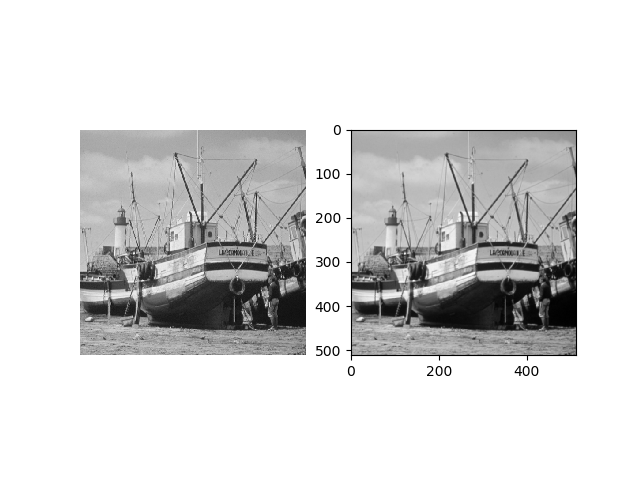

(-0.5, 511.5, 511.5, -0.5)

In [11]:
fig, ((ax1, ax5)) = plt.subplots(1, 2)
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt, cmap='gray')
ax1.axis('off')

## Spoilers das próximas aulas

### Filtro passa-baixa

In [12]:
w_low = np.ones([3, 3], dtype=float) / 9
print(w_low)
print(w_low.sum())

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
1.0


In [13]:
img_filt_low = ndi.convolve(img_gray, w_low)

<IPython.core.display.Javascript object>


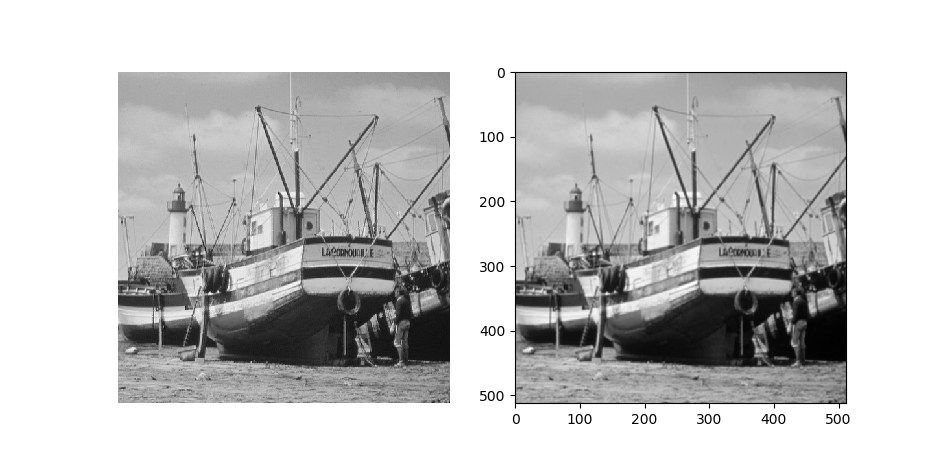

(-0.5, 511.5, 511.5, -0.5)

In [14]:
fig, ((ax1, ax5)) = plt.subplots(1, 2)
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt_low, cmap='gray')
ax1.axis('off')

### Filtro passa-alta

In [15]:
w_high = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=float)

print(w_high)
print(w_high.sum())

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
0.0


In [16]:
img_filt_high = ndi.convolve(img_gray, w_high)

print(img_filt_high.shape, img_filt_high.dtype, img_filt_high.min(), img_filt_high.max())

(512, 512) uint8 0 255


<IPython.core.display.Javascript object>


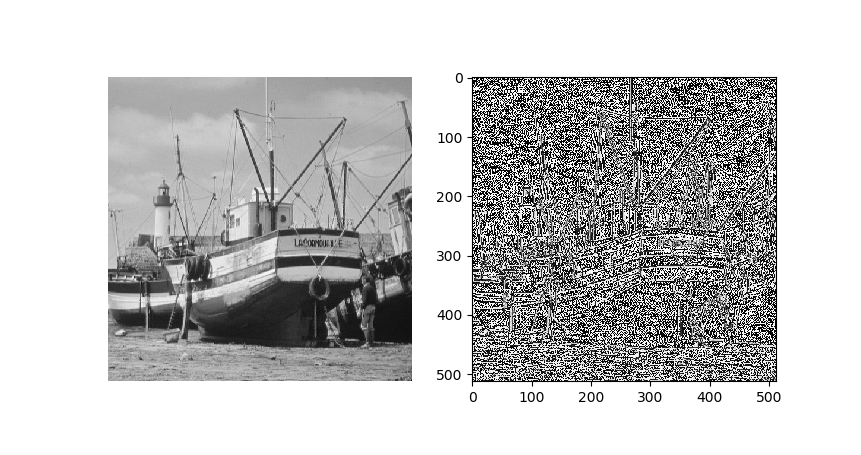

(-0.5, 511.5, 511.5, -0.5)

In [17]:
fig, ((ax1, ax5)) = plt.subplots(1, 2)
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt_high, cmap='gray')
ax1.axis('off')

### Mais spoilers...

In [18]:
img_filt_low_high = ndi.convolve(img_filt_low, w_high)

print(img_filt_low_high.shape, img_filt_low_high.dtype, img_filt_low_high.min(), img_filt_low_high.max())

(512, 512) uint8 0 255


<IPython.core.display.Javascript object>


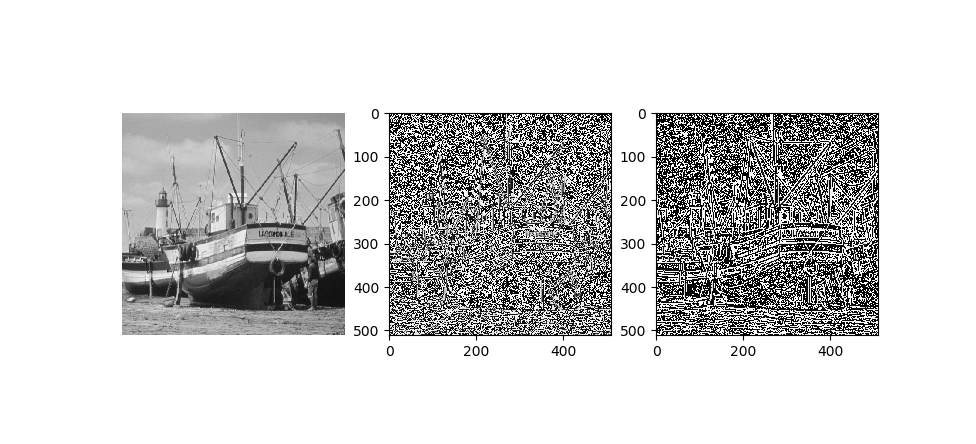

(-0.5, 511.5, 511.5, -0.5)

In [19]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3)

img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

img_ = ax2.imshow(img_filt_high, cmap='gray')
ax1.axis('off')

img_ = ax5.imshow(img_filt_low_high, cmap='gray')
ax1.axis('off')

#### Dá para melhorar...

In [20]:
w_low_5 = np.ones([5, 5], dtype=float) / (5 * 5)

In [21]:
img_low_high_2 = ndi.convolve(ndi.convolve(img_gray, w_low_5), w_high)

<IPython.core.display.Javascript object>


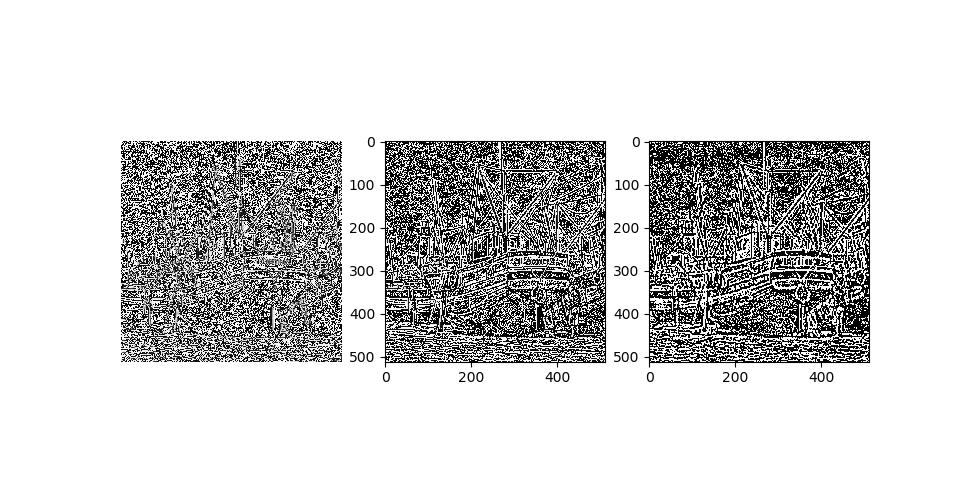

(-0.5, 511.5, 511.5, -0.5)

In [22]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3)

img_ = ax1.imshow(img_filt_high, cmap='gray')
ax1.axis('off')

img_ = ax2.imshow(img_filt_low_high, cmap='gray')
ax1.axis('off')

img_ = ax5.imshow(img_low_high_2, cmap='gray')
ax1.axis('off')

# Bibliografia

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'filters'.

    https://scikit-image.org/docs/dev/api/skimage.filters.html
    
NumPy. Documentação.

       https://numpy.org/doc/stable/
        
NumPy. Convolução
        
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
            
Sobre convolução e redes neurais...

    Amelie Byun et al. CS231n: Convolutional Neural Networks for Visual Recognition. Spring 2020
    
    https://cs231n.github.io/convolutional-networks/
            